In [1]:
import codecs
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/ATLAS/ATLAS/")
from utils import *


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
atlas_path = 'Gaia20fnr_red.txt'

data_o, data_c = read_atlas_csv(atlas_path)

gaia_path = 'Gaia20fnr.txt'

data_gaia = edit_gaia_file(gaia_path)

/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/ATLAS/ATLAS/utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['err_mag'] = get_gaia_errors(df_cleaned['averagemag'])


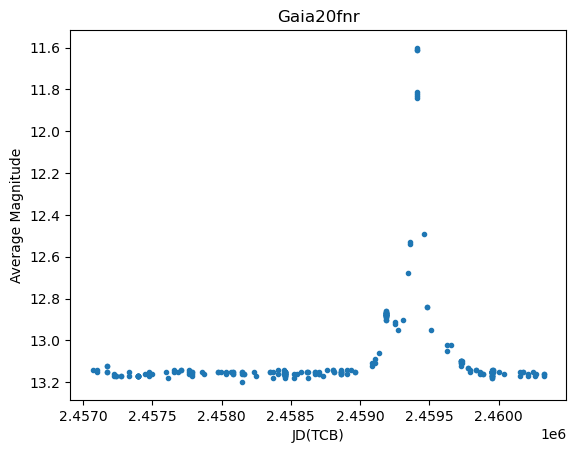

In [3]:
import matplotlib.pyplot as plt

plt.errorbar(data_gaia['JD(TCB)'], data_gaia['averagemag'],yerr=data_gaia['err_mag'],fmt='.')
plt.gca().invert_yaxis()


plt.xlabel('JD(TCB)')
plt.ylabel('Average Magnitude')
plt.title('Gaia20fnr')
plt.show()

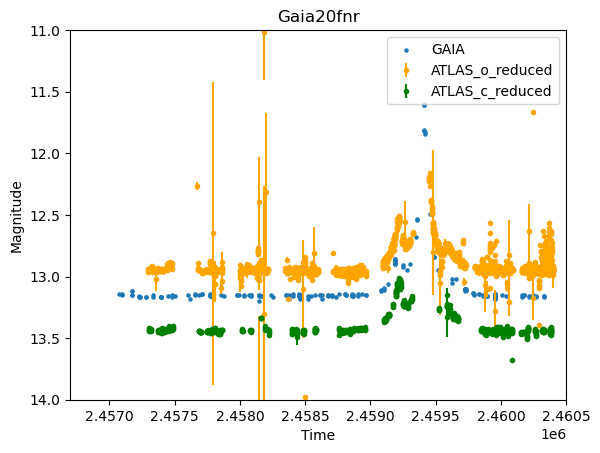

In [4]:
plt.scatter(data_gaia['JD(TCB)'], data_gaia['averagemag'],s=5 ,label='GAIA')
plt.errorbar(data_o['t'], data_o['m'],yerr=data_o['m_err'],fmt='.', color='orange',label='ATLAS_o_reduced')
plt.errorbar(data_c['t'],data_c['m'], yerr=data_c['m_err'] ,fmt='.', color='green',label='ATLAS_c_reduced')
plt.legend()
plt.gca().invert_yaxis()



plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Gaia20fnr')
plt.ylim(14,11)
plt.xlim(2456700,2460500)
plt.show()

In [5]:
data_o, data_c = clean_atlas(data_o, data_c)

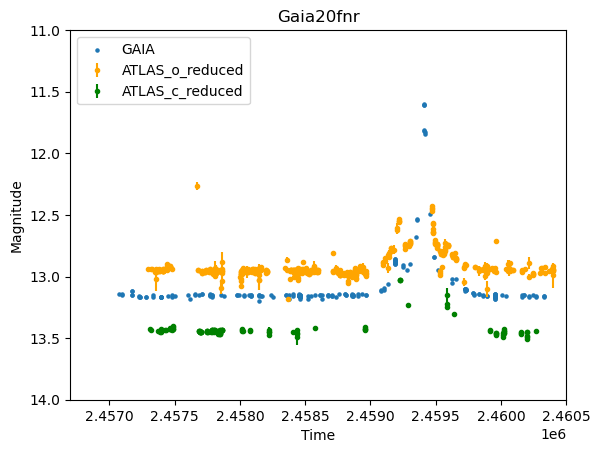

In [6]:
plt.scatter(data_gaia['JD(TCB)'], data_gaia['averagemag'],s=5 ,label='GAIA')
plt.errorbar(data_o['t'], data_o['m'],yerr=data_o['m_err'],fmt='.', color='orange',label='ATLAS_o_reduced')
plt.errorbar(data_c['t'],data_c['m'], yerr=data_c['m_err'] ,fmt='.', color='green',label='ATLAS_c_reduced')
plt.legend()
plt.gca().invert_yaxis()
plt.ylim(14,11)
plt.xlim(2456700,2460500)


plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Gaia20fnr')
plt.show()

In [7]:
data_o = data_o[['t', 'm' , 'm_err']]
data_c = data_c[['t', 'm' , 'm_err']]
data_gaia = data_gaia[['JD(TCB)',	'averagemag', 'err_mag']]

In [8]:
# data_o.to_csv("Gaia_ATLAS_o.txt", sep="\t", index=False, header=False)
# data_c.to_csv("Gaia_ATLAS_c.txt", sep="\t", index=False, header=False)
# df_cleaned.to_csv("Gaia.txt", sep="\t", index=False, header=False)

In [9]:
import os, sys

from pyLIMA import event
from pyLIMA import telescopes


your_event = event.Event()
your_event.name = 'Gaia20fnr'

In [10]:
## Load up the data
data_1 = data_o.values #np.loadtxt('Gaia_ATLAS_o.txt')
telescope_1 = telescopes.Telescope(name = 'ATLAS_o',
                                   camera_filter = 'R',
                                   light_curve = data_1.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_2 = data_c.values #np.loadtxt('Gaia_ATLAS_c.txt')
telescope_2 = telescopes.Telescope(name = 'ATLAS_c',
                                   camera_filter = 'V',
                                   light_curve = data_2.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_3 = data_gaia.values #np.loadtxt('Gaia.txt')
telescope_3 = telescopes.Telescope(name = 'Gaia',
                                   camera_filter = 'G',
                                   light_curve = data_3.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


data_4 = np.loadtxt('ASASSN_V.txt')
telescope_4 = telescopes.Telescope(name = 'ASASSN_V',
                                   camera_filter = 'V',
                                   light_curve = data_4.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])



data_5 = np.loadtxt('ASASSN_g.txt')
telescope_5 = telescopes.Telescope(name = 'ASASSN_g',
                                   camera_filter = 'G',
                                   light_curve = data_5.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


# data_6 = np.loadtxt('/content/drive/My Drive/Observing Microlensing with ATLAS/TESS_Data/TESS_sec33.txt')
# telescope_6 = telescopes.Telescope(name = 'TESS_sec33',
#                                    camera_filter = 'T',
#                                    light_curve = data_6.astype(float),
#                                    light_curve_names = ['time','mag','err_mag'],
#                                    light_curve_units = ['JD','mag','mag'])


# data_7 = np.loadtxt('/content/drive/My Drive/Observing Microlensing with ATLAS/TESS_Data/TESS_sec6.txt')
# telescope_7 = telescopes.Telescope(name = 'TESS_sec6',
#                                    camera_filter = 'T',
#                                    light_curve = data_7.astype(float),
#                                    light_curve_names = ['time','mag','err_mag'],
#                                    light_curve_units = ['JD','mag','mag'])

In [11]:
## Append these two telescope data sets to your EVENT object.
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
# your_event.telescopes.append(telescope_6)
# your_event.telescopes.append(telescope_7)

In [12]:
### Define the survey telescope that you want to use to align all other data sets to.
### We recommend using the data set with the most measurements covering the gretest
### time span of observations:
your_event.find_survey('Gaia')

In [13]:
from pyLIMA.models import PSBL_model
psbl = PSBL_model.PSBLmodel(your_event)

In [14]:
initial_parameters = [2459406.30627, 0.33647, 46.01927, 0.59084, 0.37058, 1.6186]

In [ ]:
from pyLIMA.fits import MCMC_fit
my_fit5 = MCMC_fit.MCMCfit(psbl)
my_fit5.model_parameters_guess = initial_parameters
my_fit5.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459406.30627, 0.33647, 46.01927, 0.59084, 0.37058, 1.6186]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


 58%|██████████████████████████████████████▏                           | 2889/5000 [05:28<03:32,  9.96it/s]

In [52]:
# my_fit5.fit_results

In [53]:
MCMC_results = my_fit5.fit_results['MCMC_chains_with_fluxes']

In [54]:
best_model_index = np.where(MCMC_results[:, :, -1] == MCMC_results[:, :, -1].max())

In [55]:
best_model_index

(array([4469, 4470]), array([9, 9]))

In [56]:
MCMC_results = my_fit5.fit_results['MCMC_chains']
print ('Parameters', '  Model','          Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        2459406.30627 ',str(np.median(MCMC_results[4000:,:,0]))[:7],'',str(np.std(MCMC_results[4000:,:,0]))[:7])
print ('u_0:', '        0.33647       ',str(np.median(MCMC_results[4000:,:,1]))[:7],'',str(np.std(MCMC_results[4000:,:,1]))[:7])
print ('t_E:', '        46.01927      ',str(np.median(MCMC_results[4000:,:,2]))[:7],'',str(np.std(MCMC_results[4000:,:,2]))[:7])
print ('s:', '          0.59084       ',str(np.median(MCMC_results[4000:,:,3]))[:7],'',str(np.std(MCMC_results[4000:,:,3]))[:7])
print ('q:', '          0.37058       ',str(np.median(MCMC_results[4000:,:,4]))[:7],'',str(np.std(MCMC_results[4000:,:,4]))[:7])
print ('alpha:', '      1.6186        ',str(np.median(MCMC_results[4000:,:,5]))[:7],'',str(np.std(MCMC_results[4000:,:,5]))[:7])

Parameters   Model           Fit      Errors
-----------------------------------
t_0:         2459406.30627  2459405  0.67361
u_0:         0.33647        0.82872  0.09386
t_E:         46.01927       46.0308  0.02488
s:           0.59084        0.20461  0.48761
q:           0.37058        0.94959  0.44159
alpha:       1.6186         1.73656  0.07007


In [57]:
MCMC_results = my_fit5.fit_results['MCMC_chains']
print ('Parameters', '  Model','          Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        2459406.30627 ',str(np.median(MCMC_results[1000:,:,0]))[:7],'',str(np.std(MCMC_results[1000:,:,0]))[:7])
print ('u_0:', '        0.33647       ',str(np.median(MCMC_results[1000:,:,1]))[:7],'',str(np.std(MCMC_results[1000:,:,1]))[:7])
print ('t_E:', '        46.01927      ',str(np.median(MCMC_results[1000:,:,2]))[:7],'',str(np.std(MCMC_results[1000:,:,2]))[:7])
print ('s:', '          0.59084       ',str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])
print ('q:', '          0.37058       ',str(np.median(MCMC_results[1000:,:,4]))[:7],'',str(np.std(MCMC_results[1000:,:,4]))[:7])
print ('alpha:', '      1.6186        ',str(np.median(MCMC_results[1000:,:,5]))[:7],'',str(np.std(MCMC_results[1000:,:,5]))[:7])

Parameters   Model           Fit      Errors
-----------------------------------
t_0:         2459406.30627  2459405  0.58239
u_0:         0.33647        0.84068  0.09195
t_E:         46.01927       46.0270  0.02360
s:           0.59084        0.20482  0.48729
q:           0.37058        0.90142  0.43090
alpha:       1.6186         1.74388  0.07614



(['t0', 'u0', 'tE', 'separation', 'mass_ratio', 'alpha', 'fsource_Gaia', 'fblend_Gaia', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ASASSN_V', 'fblend_ASASSN_V', 'fsource_ASASSN_g', 'fblend_ASASSN_g', 'fsource_TESS_sec33', 'fblend_TESS_sec33', 'fsource_TESS_sec6', 'fblend_TESS_sec6'])

In [58]:
my_fit5.fit_results['best_model']

array([ 2.45940625e+06,  8.27442252e-01,  4.60348756e+01,  2.04416096e-01,
        9.99992686e-01,  1.73649741e+00,  2.69888893e+06, -2.19761683e+06,
        2.69888893e+06, -2.19761683e+06,  3.09658629e+06, -2.49257927e+06,
        3.76394939e+06, -3.38190592e+06,  3.09658629e+06, -2.49257927e+06,
        3.76394939e+06, -3.38190592e+06, -2.29903295e+08,  2.30301848e+08,
        1.22542090e+06, -9.61907984e+05])

In [59]:
my_fit5.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'separation', 'mass_ratio', 'alpha'])

ValueError: Encountered duplicate field name: 'fsource_Gaia'

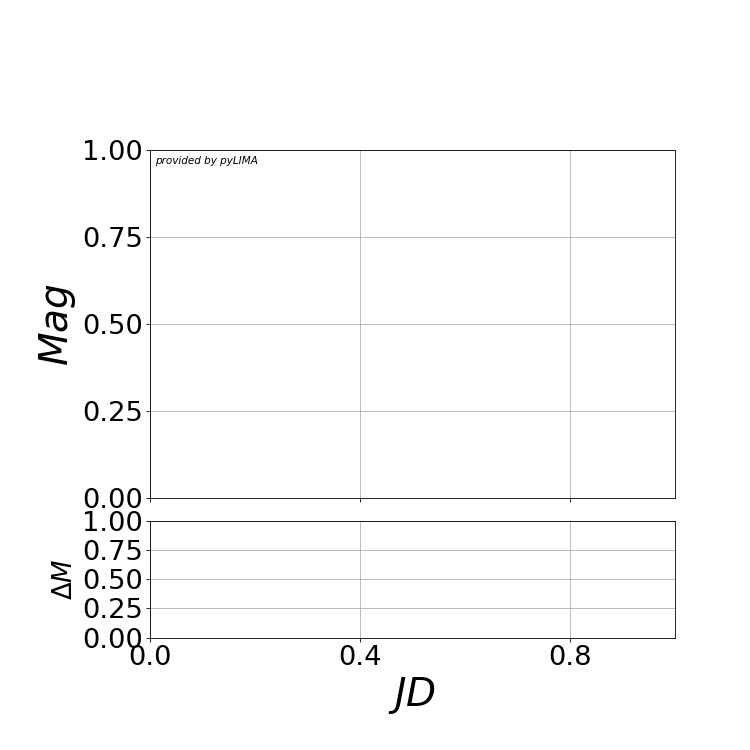

In [60]:
%matplotlib widget
from pyLIMA.outputs import pyLIMA_plots
# from google.colab import output
# output.enable_custom_widget_manager()

pyLIMA_plots.plot_lightcurves(psbl, my_fit5.fit_results['best_model'])

# plt.show()

# output.disable_custom_widget_manager()

(<Figure size 750x750 with 2 Axes>, GridBox(id='1005', ...))

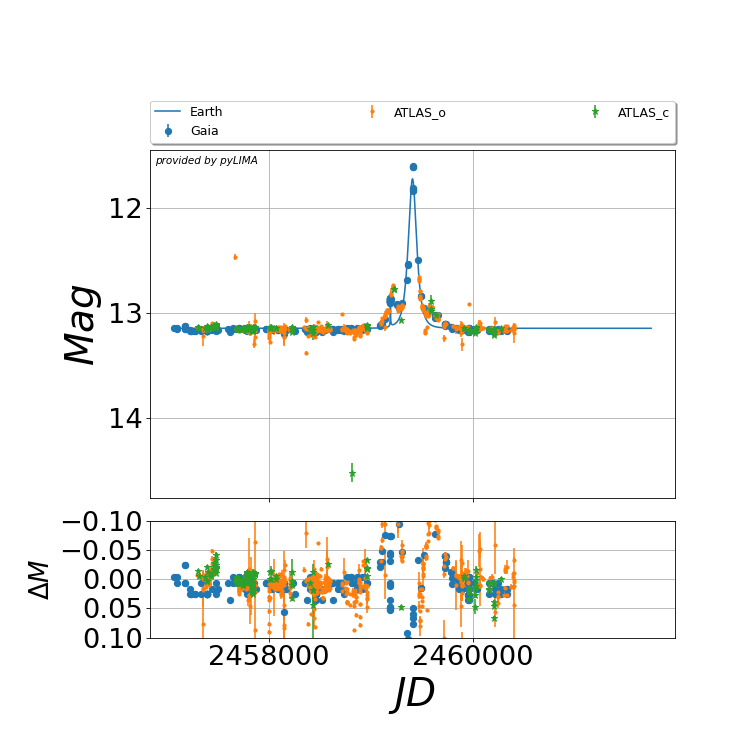

In [46]:
%matplotlib widget
from pyLIMA.outputs import pyLIMA_plots
# from google.colab import output
# output.enable_custom_widget_manager()

pyLIMA_plots.plot_lightcurves(psbl, my_fit5.fit_results['best_model'])

# plt.show()

# output.disable_custom_widget_manager()